<center><h1 style="color:#1a1a1a;
                    font-size:3em">
        NHANES - MTech Project 
        </h1> 
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Feature Selection - Previous Studies fields - Excluded Lab Data
       </h2>
       <h3 style="color:#1a1a1a;
                    font-size:2em">
        Prakash Easow Thomas - 2022DA04285 - June 2024
       </h3>
</center>

# 1. Importing Libraries and Reading the Datasets

## 1.1 Importing the Libraries

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## 1.2 Reading the NHANES 2018 Datasets

In [5]:
merged_dfNHAENES2018_selected  = pd.read_csv('C:\Prakash\Personal\Studies\Techincal\MTech. Data Science and Engineering\Semester-wise\Semester-I\Study\Sem-I - 0- Python Fundamentals for Data Science (S1-22_DSECLPFDS)\PythonPgm\MTech-Proj03-NHANES-2018\Data\After_DataPreprocessing_NoLab.csv')

# 2. Data Verification - NHANES 2018 Data

## 2.1 Data Verification

In [7]:
print(merged_dfNHAENES2018_selected)

      RIDAGEYR  RIDRETH3  RIAGENDR  BMXBMI  DIQ175A  RHQ162  DR1TALCO  DID260  \
0         66.0       4.0       2.0    31.7      2.0     2.0       0.0     0.0   
1         18.0       6.0       1.0    21.5      2.0     2.0       0.0     0.0   
2         13.0       7.0       1.0    18.1      2.0     2.0       0.0     0.0   
3         66.0       6.0       2.0    23.7      2.0     1.0       0.0     0.0   
4         75.0       4.0       2.0    38.9      2.0     2.0       0.0     0.0   
...        ...       ...       ...     ...      ...     ...       ...     ...   
5946      70.0       6.0       2.0    20.0      2.0     2.0       0.0     0.0   
5947      42.0       1.0       1.0    35.8      2.0     2.0       0.0     0.0   
5948      41.0       4.0       2.0    26.1      2.0     2.0       0.0     0.0   
5949      14.0       4.0       2.0    45.6      2.0     2.0       0.0     0.0   
5950      38.0       3.0       1.0    36.1      2.0     2.0       0.0     0.0   

      BPXOSY1  BPXODI1  ...

In [8]:
nan_counts = merged_dfNHAENES2018_selected.isna().sum()
print("\nCount of NaN values in each column:")
print(nan_counts)


Count of NaN values in each column:
RIDAGEYR                      0
RIDRETH3                      0
RIAGENDR                      0
BMXBMI                        0
DIQ175A                       0
RHQ162                        0
DR1TALCO                      0
DID260                        0
BPXOSY1                       0
BPXODI1                       0
BPXOSY2                       0
BPXODI2                       0
BPXOSY3                       0
BPXODI3                       0
MCQ160B                       0
DS2TCHOL                      0
DSQTCHOL                      0
DMDEDUC3                      0
DMDEDUC2                      0
CBD765                        0
BPD035                        0
BPQ040A                       0
IND235                        0
DIQ050                        0
RIDEXPRG                      0
SLD012                        0
BMXWAIST                      0
DIQ070                        0
Physically_Active_Classify    0
LBXGH_Classify                0
dty

In [9]:
columns_to_drop = [
'DR1TALCO',    # Dropped
'DS2TCHOL',    # Dropped
'DSQTCHOL',    # Dropped
'MCQ160B',     # Dropped
'BPQ040A',     # Dropped
#'IND235',
#'INQ030',
#'INQ060',
#'INQ080',
#'INQ090',
#'IND235',      # Dropped
'DIQ050',       
'DIQ070',       
#'RHQ162',
#'RIAGENDR',
'SLD012'
]
merged_dfNHAENES2018_selected = merged_dfNHAENES2018_selected.drop(columns_to_drop,axis=1)
merged_dfNHAENES2018_stored = merged_dfNHAENES2018_selected
merged_dfNHAENES2018_selected=merged_dfNHAENES2018_selected.drop('LBXGH_Classify',axis=1)

# 3. Correlation Analysis

## 3.1 Normalizing the data 

In [11]:
min_max_scaler = MinMaxScaler()
normalized_df1 = pd.DataFrame(min_max_scaler.fit_transform(merged_dfNHAENES2018_selected), columns=merged_dfNHAENES2018_selected.columns)
normalized_df1.corr()

,RIDAGEYR,RIDRETH3,RIAGENDR,BMXBMI,DIQ175A,RHQ162,DID260,BPXOSY1,BPXODI1,BPXOSY2,...,BPXOSY3,BPXODI3,DMDEDUC3,DMDEDUC2,CBD765,BPD035,IND235,RIDEXPRG,BMXWAIST,Physically_Active_Classify
RIDAGEYR,1.000000,-0.011855,-0.004772,0.167197,-0.018453,-0.005948,0.186608,0.490451,0.208799,0.485522,...,0.478616,0.181174,0.253516,0.290708,0.129104,0.539028,-0.023587,0.034009,0.235700,-0.197913
RIDRETH3,-0.011855,1.000000,-0.011755,-0.102861,0.003769,0.023985,-0.015396,0.019633,0.058404,0.028488,...,0.028978,0.059170,0.119211,0.209924,0.186892,0.020752,0.098413,0.002054,-0.100331,0.020514
RIAGENDR,-0.004772,-0.011755,1.000000,0.069924,0.056661,-0.152295,-0.027435,-0.121921,-0.035595,-0.116829,...,-0.118628,-0.051717,0.012316,0.043449,0.040206,-0.007993,-0.019275,-0.037886,-0.089849,-0.132489
BMXBMI,0.167197,-0.102861,0.069924,1.000000,0.126978,-0.084981,0.095264,0.089078,0.232946,0.089091,...,0.089572,0.224511,0.144588,0.129899,0.077459,0.180513,-0.042641,-0.027373,0.674321,-0.051514
DIQ175A,-0.018453,0.003769,0.056661,0.126978,1.000000,-0.053250,-0.103176,-0.002281,0.084392,-0.004916,...,0.001997,0.084271,0.097374,0.135634,0.108041,0.002648,0.026758,-0.010695,0.102037,0.011715
RHQ162,-0.005948,0.023985,-0.152295,-0.084981,-0.053250,1.000000,-0.043209,0.019080,-0.021934,0.009939,...,0.011479,-0.016508,-0.039953,-0.045292,-0.031995,-0.007945,-0.001418,0.029449,-0.074960,0.024491
DID260,0.186608,-0.015396,-0.027435,0.095264,-0.103176,-0.043209,1.000000,0.088246,-0.003204,0.087631,...,0.077012,-0.009155,0.009922,-0.004857,-0.025054,0.169498,-0.026010,0.013235,0.101127,-0.077529
BPXOSY1,0.490451,0.019633,-0.121921,0.089078,-0.002281,0.019080,0.088246,1.000000,0.611188,0.947893,...,0.935069,0.567424,0.105756,0.093979,0.014249,0.385086,-0.053426,0.041829,0.147936,-0.074388
BPXODI1,0.208799,0.058404,-0.035595,0.232946,0.084392,-0.021934,-0.003204,0.611188,1.000000,0.612770,...,0.610009,0.907930,0.140966,0.156111,0.079183,0.187271,-0.026123,0.049063,0.199095,-0.034317
BPXOSY2,0.485522,0.028488,-0.116829,0.089091,-0.004916,0.009939,0.087631,0.947893,0.612770,1.000000,...,0.944544,0.582633,0.111062,0.101405,0.021433,0.375068,-0.043947,0.037587,0.147401,-0.070499


## 3.2 Applying the Correlation and Heat map

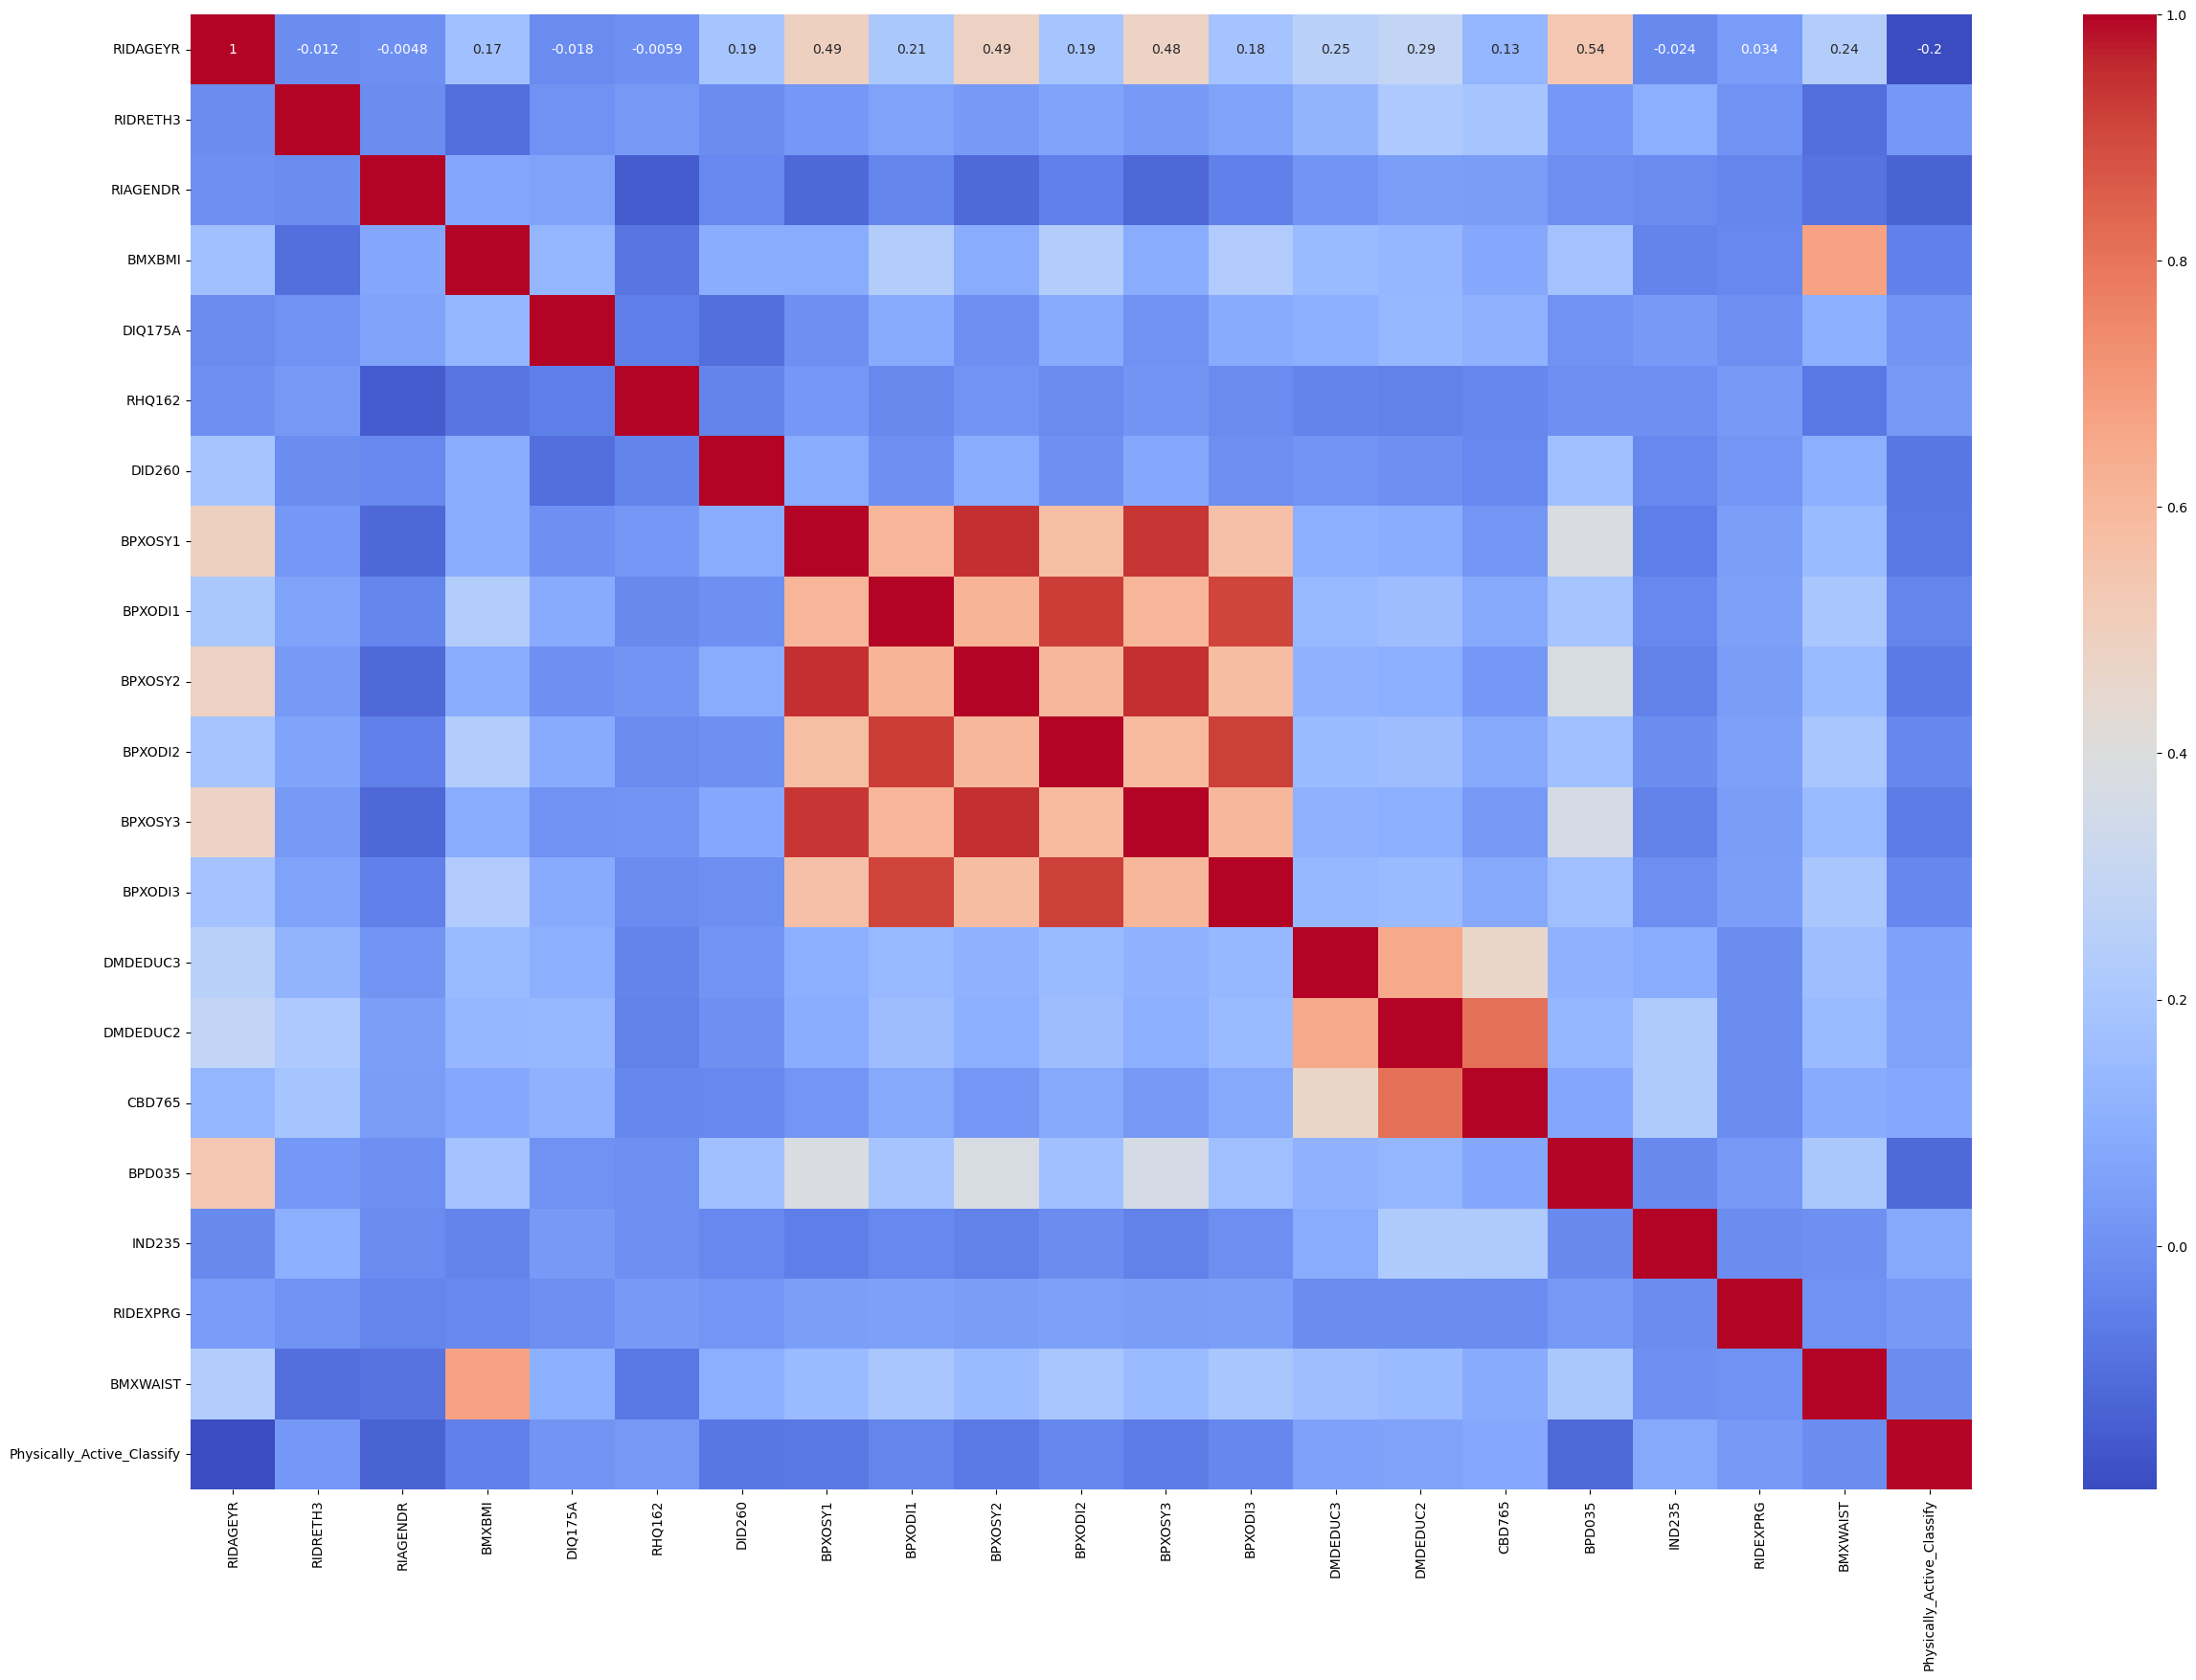

In [13]:
corr1 = normalized_df1.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(corr1, annot=True, cmap='coolwarm',annot_kws={"size": 10})
plt.show()

In [14]:
print(corr1.columns)

Index(['RIDAGEYR', 'RIDRETH3', 'RIAGENDR', 'BMXBMI', 'DIQ175A', 'RHQ162',
       'DID260', 'BPXOSY1', 'BPXODI1', 'BPXOSY2', 'BPXODI2', 'BPXOSY3',
       'BPXODI3', 'DMDEDUC3', 'DMDEDUC2', 'CBD765', 'BPD035', 'IND235',
       'RIDEXPRG', 'BMXWAIST', 'Physically_Active_Classify'],
      dtype='object')


In [15]:
def correlation(dataset, threshold):
    df = pd.DataFrame(columns=[ 'Field Name ','Correlation Value'])
    col_corr = set()
    k=0
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
#            if abs(corr_matrix.iloc[i,j]) > threshold:
            if  corr_matrix.iloc[i,j]  > threshold:
                colnamei = corr_matrix.columns[i]
                colnamej = corr_matrix.columns[j]
                new_row =pd.DataFrame({'Field Name ': [colnamei],'Correlation Value':[corr_matrix.iloc[i,j]]})
                df = pd.concat([df, new_row], ignore_index=True)
                col_corr.add(colnamei)
    return col_corr,df

In [16]:
corr1_features,corr_data =correlation(normalized_df1,0.9)

C:\Users\praka\AppData\Local\Temp\ipykernel_37852\3573089399.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row], ignore_index=True)


In [17]:
print(corr1_features)

{'BPXOSY2', 'BPXODI3', 'BPXOSY3', 'BPXODI2'}


In [18]:
corr_data = corr_data.drop_duplicates(subset=['Field Name '])
corr_data =corr_data.reset_index(drop=True)
print(corr_data)  # Correlated data based on Non-Lab Data

  Field Name   Correlation Value
0     BPXOSY2           0.947893
1     BPXODI2           0.923712
2     BPXOSY3           0.935069
3     BPXODI3           0.907930


In [19]:
df_fnd = pd.read_csv('C:\Prakash\Personal\Studies\Techincal\MTech. Data Science and Engineering\Semester-wise\Semester-I\Study\Sem-I - 0- Python Fundamentals for Data Science (S1-22_DSECLPFDS)\PythonPgm\MTech-Proj03-NHANES-2018\Field_Names_Details.csv')
filtered_df_fnd = df_fnd[df_fnd['Field Name '].isin(corr_data['Field Name '])]
columns_to_select = ['File','Field Name ','Field Descriptions']
selected_filtered_df_fnd =filtered_df_fnd[columns_to_select]
#print(selected_filtered_df_fnd.head(50))
common_key = 'Field Name '
Final_HbA1c_Correlated_Data = corr_data.merge(selected_filtered_df_fnd, on=common_key, how='outer')
print('************** Correlated field On Non Lab Data********************')
print(Final_HbA1c_Correlated_Data)

************** Correlated field On Non Lab Data********************
  Field Name   Correlation Value         File  \
0     BPXOSY2           0.947893  Examination   
1     BPXODI2           0.923712  Examination   
2     BPXOSY3           0.935069  Examination   
3     BPXODI3           0.907930  Examination   

                      Field Descriptions  
0   Systolic - 2nd oscillometric reading  
1  Diastolic - 2nd oscillometric reading  
2   Systolic - 3rd oscillometric reading  
3  Diastolic - 3rd oscillometric reading  


In [20]:
merged_dfNHAENES2018_final = merged_dfNHAENES2018_stored.drop(columns=corr1_features)
print(merged_dfNHAENES2018_final)

      RIDAGEYR  RIDRETH3  RIAGENDR  BMXBMI  DIQ175A  RHQ162  DID260  BPXOSY1  \
0         66.0       4.0       2.0    31.7      2.0     2.0     0.0    164.0   
1         18.0       6.0       1.0    21.5      2.0     2.0     0.0    126.0   
2         13.0       7.0       1.0    18.1      2.0     2.0     0.0    136.0   
3         66.0       6.0       2.0    23.7      2.0     1.0     0.0    146.0   
4         75.0       4.0       2.0    38.9      2.0     2.0     0.0    120.0   
...        ...       ...       ...     ...      ...     ...     ...      ...   
5946      70.0       6.0       2.0    20.0      2.0     2.0     0.0    154.0   
5947      42.0       1.0       1.0    35.8      2.0     2.0     0.0    135.0   
5948      41.0       4.0       2.0    26.1      2.0     2.0     0.0    123.0   
5949      14.0       4.0       2.0    45.6      2.0     2.0     0.0     92.0   
5950      38.0       3.0       1.0    36.1      2.0     2.0     0.0    143.0   

      BPXODI1  DMDEDUC3  DMDEDUC2  CBD7

In [21]:
merged_dfNHAENES2018_final.to_csv('C:\Prakash\Personal\Studies\Techincal\MTech. Data Science and Engineering\Semester-wise\Semester-I\Study\Sem-I - 0- Python Fundamentals for Data Science (S1-22_DSECLPFDS)\PythonPgm\MTech-Proj03-NHANES-2018\Data\After_Feature_Selection_NoLab.csv', index=False)
merged_dfNHAENES2018_final.to_excel('C:\Prakash\Personal\Studies\Techincal\MTech. Data Science and Engineering\Semester-wise\Semester-I\Study\Sem-I - 0- Python Fundamentals for Data Science (S1-22_DSECLPFDS)\PythonPgm\MTech-Proj03-NHANES-2018\Data\After_Feature_Selection_NoLab.xlsx', index=False)